In [198]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the Data

In [199]:
housing_df = pd.read_csv("Housing.csv")

In [200]:
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


The dataset contains 545 rows and 13 columns. Each row of the dataset contains information about one house.

In [201]:
housing_df.info()

print("\n\nMissing Values in every column: ")
housing_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Missing Values in every column: 


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

"price," "area," "bedrooms," "bathrooms," "parking," and "stories" are integers, whereas "mainroad," "guestroom," "basement," hotwaterheating," "airconditioning," "prefarea," and "furnishingstatus" are categories (strings). Additionally, none of the columns contains missing values.

In [202]:
housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


The ranges of values in the columns seems reasonable. The "price" columns seems skewed, aas the median is lower than the mean.

In [203]:
housing_df.duplicated().sum()

0

This shows that there are no duplicated rows in the dataset.

## Exploratory Analysis and Visualization

### Price Distribution

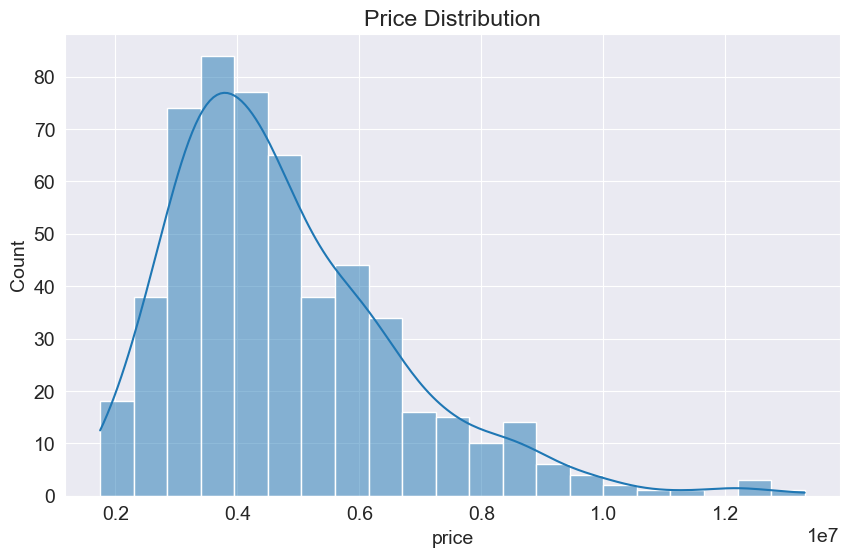

In [204]:
sns.histplot(housing_df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

In [ ]:
fig = px.histogram(housing_df, x='price', marginal='box', nbins=50, title='Distribution of House Prices')
fig.update_layout(bargap=0.1)
fig.show()


The price distribution is right-skewed, meaning that most houses have relatively lower prices, but there is a small subset of extremely high-priced properties. The box plot indicates the presence of outliers on the higher end of the price spectrum, with some properties priced much higher than the majority.

### Area Distribution

In [ ]:
fig = px.histogram(housing_df, x='area', marginal='box', nbins=50, title='Distribution of Area')
fig.show()


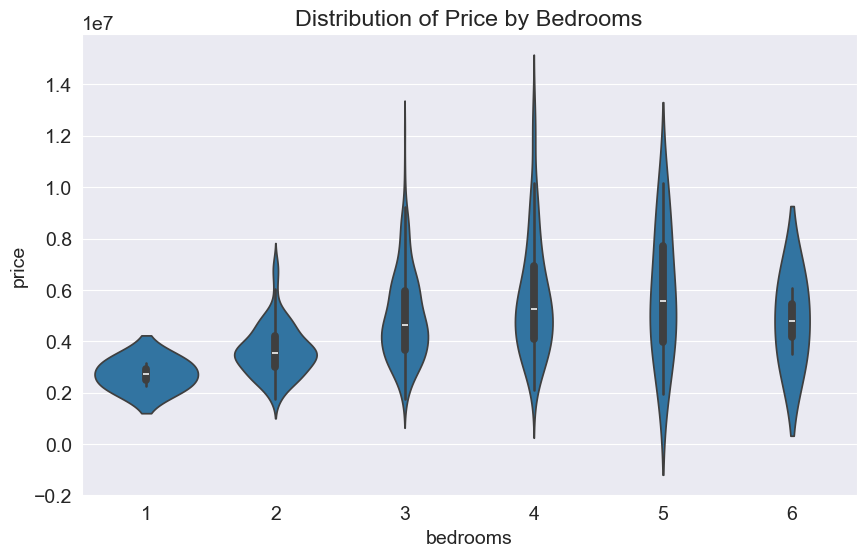

In [207]:
# Violin plot with 'bedrooms' on x-axis and 'price' (or 'charges') on y-axis
sns.violinplot(x='bedrooms', y='price', data=housing_df)

# Set the plot title and display it
plt.title('Distribution of Price by Bedrooms')
plt.show()

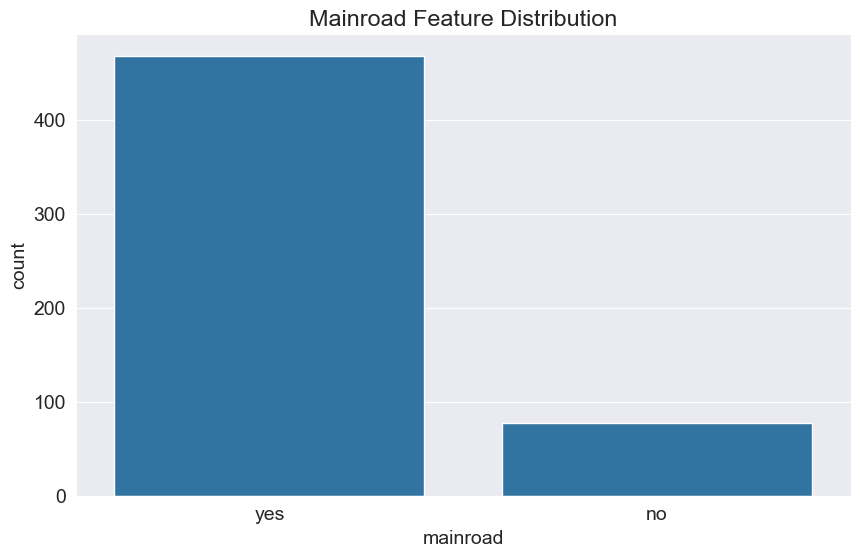

In [208]:
sns.countplot(x='mainroad', data=housing_df)
plt.title('Mainroad Feature Distribution')
plt.show()


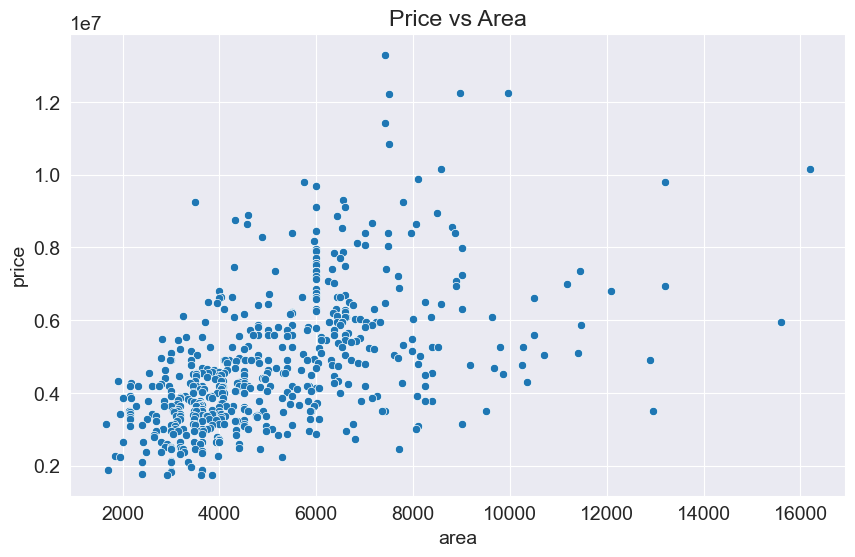

In [209]:
sns.scatterplot(x='area', y='price', data=housing_df)
plt.title('Price vs Area')
plt.show()

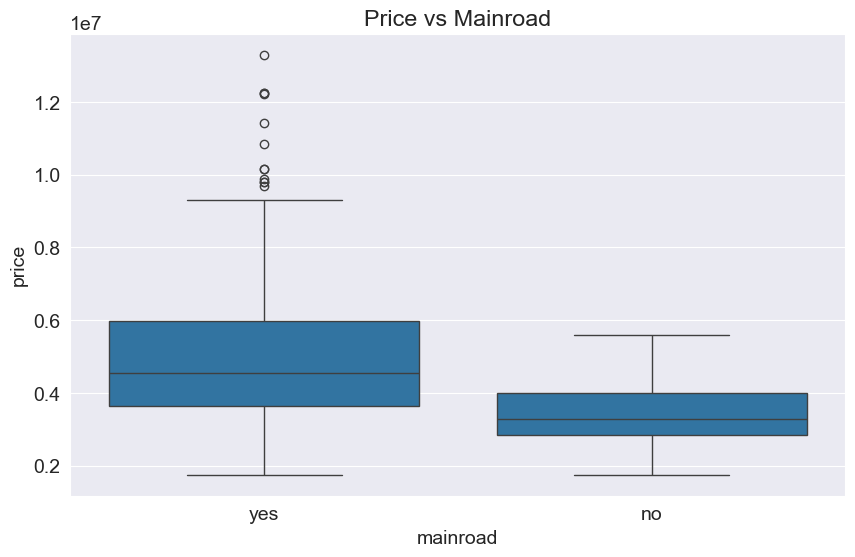

In [210]:
sns.boxplot(x='mainroad', y='price', data=housing_df)
plt.title('Price vs Mainroad')
plt.show()


In [211]:
fig = px.scatter(housing_df, x='area', y='price', color='mainroad', opacity=0.8, title='Area vs Price')
fig.update_traces(marker=dict(size=5)) 
fig.show()


In [212]:
fig = px.scatter(housing_df, x='area', y='price', color='guestroom', opacity=0.8, title='Area vs Price')
fig.update_traces(marker=dict(size=5)) 
fig.show()

In [213]:
fig = px.scatter(housing_df, x='area', y='price', color='basement', opacity=0.8, title='Area vs Price')
fig.update_traces(marker=dict(size=5)) 
fig.show()


In [214]:
fig = px.scatter(housing_df, x='area', y='price', color='hotwaterheating', opacity=0.8, title='Area vs Price')
fig.update_traces(marker=dict(size=5)) 
fig.show()


In [215]:
fig = px.scatter(housing_df, x='area', y='price', color='airconditioning', opacity=0.8, title='Area vs Price')
fig.update_traces(marker=dict(size=5)) 
fig.show()


### Correlation

Converting the categorical columns to numeric values using encoding.

In [216]:
housing_df['mainroad'] = housing_df['mainroad'].map({'yes': 1, 'no': 0})
housing_df['guestroom'] = housing_df['guestroom'].map({'yes': 1, 'no': 0})
housing_df['basement'] = housing_df['basement'].map({'yes': 1, 'no': 0})
housing_df['hotwaterheating'] = housing_df['hotwaterheating'].map({'yes': 1, 'no': 0})
housing_df['airconditioning'] = housing_df['airconditioning'].map({'yes': 1, 'no': 0})
housing_df['prefarea'] = housing_df['prefarea'].map({'yes': 1, 'no': 0})


The "furnishingstatus" column contains 3 values, so we use hot encoding and create a column for each unique status.

In [217]:
from sklearn import preprocessing

# Initialize the OneHotEncoder with sparse_output=False to get a dense array
enc = preprocessing.OneHotEncoder(sparse_output=False)

# Fit and transform the 'furnishingstatus' column
encoded_furnishing = enc.fit_transform(housing_df[['furnishingstatus']])

# Create a DataFrame from the encoded values and use the column names from the encoder
encoded_df = pd.DataFrame(encoded_furnishing, columns=enc.get_feature_names_out(['furnishingstatus']))

# Concatenate the new columns to the original DataFrame
housing_df = pd.concat([housing_df, encoded_df], axis=1)

# Drop the original 'furnishingstatus' column
housing_df = housing_df.drop(columns=['furnishingstatus'])

In [218]:
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0,0.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.0,1.0,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0,0.0,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0.0,0.0,1.0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0.0,1.0,0.0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0.0,0.0,1.0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1.0,0.0,0.0


In [219]:
housing_df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.229350,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.079054,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.053179,-0.094086


Visualizing the correlation matrix using a heatmap

Text(0.5, 1.0, 'Correlation Matrix')

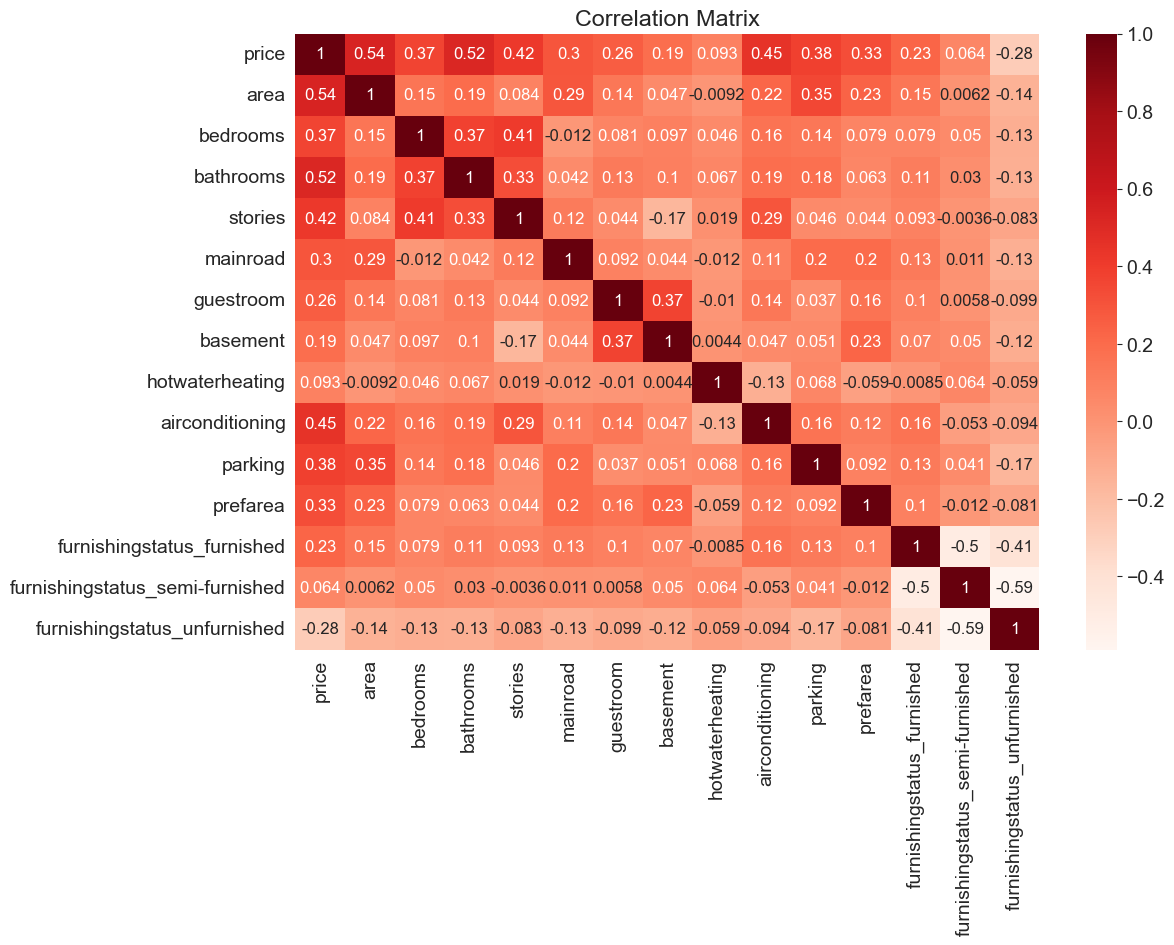

In [220]:
plt.figure(figsize=(12, 8))  # Increase figure size for more space
sns.heatmap(housing_df.corr(), cmap='Reds', annot=True, annot_kws={"size": 12}) 
plt.title('Correlation Matrix')

## Linear Regression using a Single Feature

In [221]:
no_hot_water_heating_df = housing_df[housing_df.hotwaterheating == 0]

<Axes: title={'center': 'Area vs Price'}, xlabel='area', ylabel='price'>

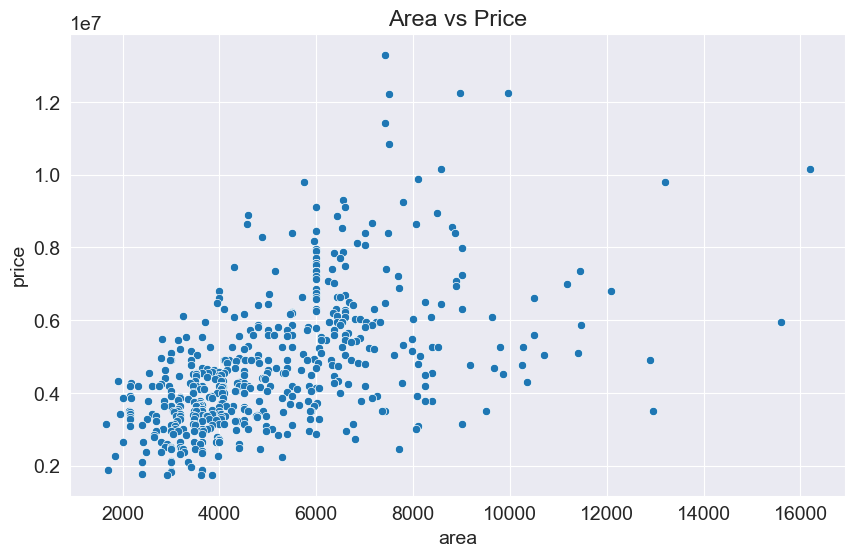

In [222]:
plt.title("Area vs Price")
sns.scatterplot(data = no_hot_water_heating_df, x = "area", y = "price")

In [223]:
def estimate_charges(age, w, b):
    return w * age + b

In [224]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [225]:
def plot_price_prediction(w,b):
    area = no_hot_water_heating_df.area
    target = no_hot_water_heating_df.price
    prediction = estimate_charges(area, w, b)

    plt.plot(area, prediction, 'r', alpha=0.9)
    plt.scatter(area, target, s=8,alpha=0.8)
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.legend(['Prediction', 'Actual'])
    
    loss = rmse(target, prediction)
    print("RMSE Loss: ", loss)

In [226]:
model = LinearRegression()

In [227]:
inputs = no_hot_water_heating_df[['area']]
targets = no_hot_water_heating_df.price

In [228]:
model.fit(inputs, targets)

LinearRegression()

In [229]:
model.coef_

array([467.07481476])

In [230]:
model.intercept_

2320855.7179533206

RMSE Loss:  1549335.2493684085


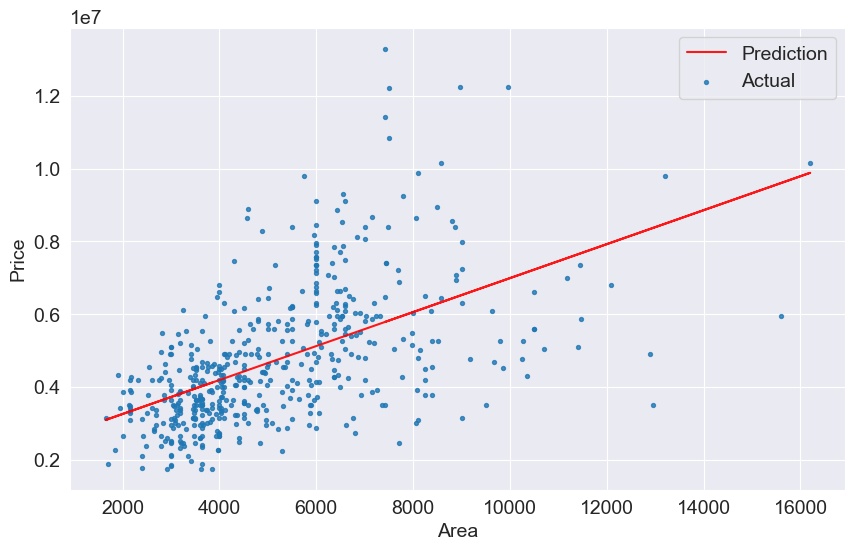

In [231]:
plot_price_prediction(model.coef_, model.intercept_)

The RMSE error is currently quite high. The model could be improved. Adding more relevant features (e.g., location, number of bedrooms, proximity to amenities) could improve the predictions.

## Linear Regression using Multiple Features

In [232]:
# Create inputs and targets
input_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
              'airconditioning', 'parking', 'prefarea', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']

inputs, targets = housing_df[input_cols], housing_df['price']


# Create and train the model
model = LinearRegression().fit(inputs, targets)


# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 1054128.892633344


## Model Improvements

Since different columns have different ranges, we scale the values in eaech numeric column using the StandardScaler class from scikit-learn.

In [233]:
numeric_cols = ['area'] 
scaler = StandardScaler()
scaler.fit(housing_df[numeric_cols])
scaled_inputs = scaler.transform(housing_df[numeric_cols])

Combining this with the categorical data

In [234]:
cat_cols = ['bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
              'airconditioning', 'parking', 'prefarea', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
categorical_data = housing_df[cat_cols].values

In [235]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = housing_df.price

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 1054128.892633344


In [236]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
14,1,1.147695e+06
2,bathrooms,9.876681e+05
8,airconditioning,8.649583e+05
7,hotwaterheating,8.554471e+05
10,prefarea,6.515438e+05
0,area,5.293306e+05
3,stories,4.508480e+05
4,mainroad,4.212726e+05
6,basement,3.501069e+05
5,guestroom,3.005259e+05


From above, it is clear that the most important featrues are:

(i) No. of bathrooms
(ii) Air Conditioning
(iii) Hot Water Heating

Creating a Test Set

In [237]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)


In [238]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 1195179.6566659901


Comparing this value with the training loss

In [239]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 1038891.137892311


The training loss is lower than the test loss, as expected. This is because the created model is already familiar with the traning set, due to which its rmse errors would be low. On the other hand, the test set is completely new to the model, so we should expect higher errors.